In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import keras
from keras.models import Sequential
from keras.layers import Dense


In [2]:
data=pd.read_csv('D:\\Drive D\\One drive folder\\OneDrive - Higher Education Commission\\Drive G\\Data science coding\\Data sets\\breast_cancer.csv')


In [3]:
data.head()

,radius1,texture1,perimeter1,area1,smoothness1,compactness1,concavity1,concave_points1,symmetry1,fractal_dimension1,...,texture3,perimeter3,area3,smoothness3,compactness3,concavity3,concave_points3,symmetry3,fractal_dimension3,Diagnosis
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,M
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,M
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,M
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,M
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,M


In [4]:
data.shape

(569, 31)

Benign 357
Malignanat 212


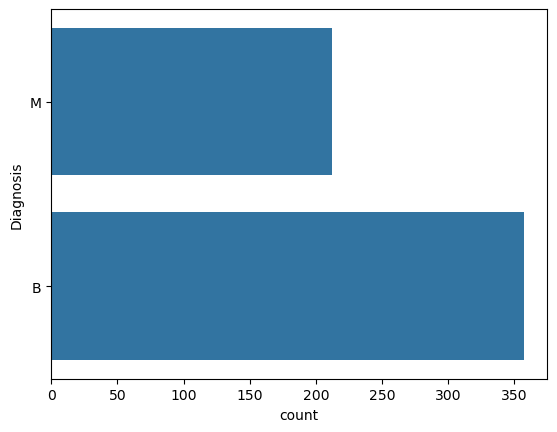

In [5]:
ax=sns.countplot(data['Diagnosis'],label="Count")
B,M=data['Diagnosis'].value_counts()
print('Benign',B)
print('Malignanat',M)

In [6]:
# find missing values
data.isnull().sum()


radius1               0
texture1              0
perimeter1            0
area1                 0
smoothness1           0
compactness1          0
concavity1            0
concave_points1       0
symmetry1             0
fractal_dimension1    0
radius2               0
texture2              0
perimeter2            0
area2                 0
smoothness2           0
compactness2          0
concavity2            0
concave_points2       0
symmetry2             0
fractal_dimension2    0
radius3               0
texture3              0
perimeter3            0
area3                 0
smoothness3           0
compactness3          0
concavity3            0
concave_points3       0
symmetry3             0
fractal_dimension3    0
Diagnosis             0
dtype: int64

In [7]:
X=data.iloc[ : , :-1].values # all rows and all columns except last column
y=data.iloc[ : , -1].values # all rows

In [8]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
y=le.fit_transform(y)

In [9]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=0)

In [10]:
# Feature scaling
from sklearn.preprocessing import StandardScaler
se=StandardScaler()
X_train=se.fit_transform(X_train) # fit and transform
X_test=se.transform(X_test) # only transform. it means that we are using the same mean and standard deviation of training data to transform test data

In [11]:
classifier=Sequential()
classifier.add(Dense(units=16,kernel_initializer='uniform',activation='relu',input_dim=30)) # input_dim=30 because we have 30 features, 16 hidden layers because we have 30 features
classifier.add(Dense(units=16,kernel_initializer='uniform',activation='relu')) # hidden layer
classifier.add(Dense(units=1,kernel_initializer='uniform',activation='sigmoid')) # output layer

c:\Users\adeel\miniconda3\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [12]:
classifier.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

In [13]:

classifier.fit(X_train, y_train, batch_size=100, epochs=50)


Epoch 1/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - accuracy: 0.7251 - loss: 0.6926
Epoch 2/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7878 - loss: 0.6905 
Epoch 3/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.8725 - loss: 0.6870 
Epoch 4/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9149 - loss: 0.6822 
Epoch 5/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9200 - loss: 0.6749 
Epoch 6/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.9363 - loss: 0.6644 
Epoch 7/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9491 - loss: 0.6486 
Epoch 8/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.9431 - loss: 0.6297 
Epoch 9/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 326us/step - accuracy: 0.9472 - loss: 0.5999
Epoch 10/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9515 - loss: 0.5714 
Epoch 11/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9555 - loss: 0.5393 
Epoch 12/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.9613 - loss: 0.5057 
E

In [14]:
y_predict=classifier.predict(X_test)
y_predict=(y_predict>0.5)
y_predict

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step


array([[ True],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [ True],
       [ True],
       [ True],
       [False],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [False],
       [False],
       [ True],
       [False],
       [False],
       [ True],
       [False],
       [ True],
       [False],
       [ True],
       [False],
       [ True],
       [False],
       [ True],
       [False],
       [ True],
       [False],
       [ True],
       [ True],
       [False],
       [ True],
       [False],
       [False],
       [ True],
       [False],
       [False],
       [False],
       [ True],
       [ True],
       [ True],
       [ True],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [ True],
       [ True],
       [ True],
       [

In [16]:
from sklearn.metrics import confusion_matrix
cm=confusion_matrix(y_test,y_predict)
cm

array([[63,  4],
       [ 2, 45]], dtype=int64)

<Axes: >

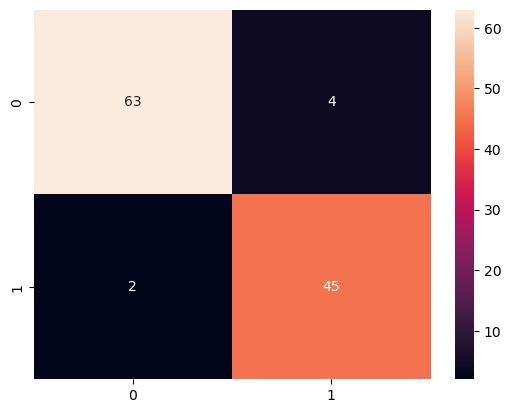

In [17]:
sns.heatmap(cm,annot=True)

# Add drop out function

c:\Users\adeel\miniconda3\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.5649 - loss: 0.6929
Epoch 2/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.6466 - loss: 0.6917 
Epoch 3/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.6008 - loss: 0.6904 
Epoch 4/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6337 - loss: 0.6874 
Epoch 5/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.6667 - loss: 0.6825 
Epoch 6/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.7002 - loss: 0.6745 
Epoch 7/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7401 - loss: 0.6648  
Epoch 8/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.7968 - loss: 0.6471 
Epoch 9/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.8226 - loss: 0.6271 
Epoch 10/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8657 - loss: 0.5997 
Epoch 11/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8732 - loss: 0.5695 
Epoch 12/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.8877 - loss: 0.5264 
E

<Axes: >

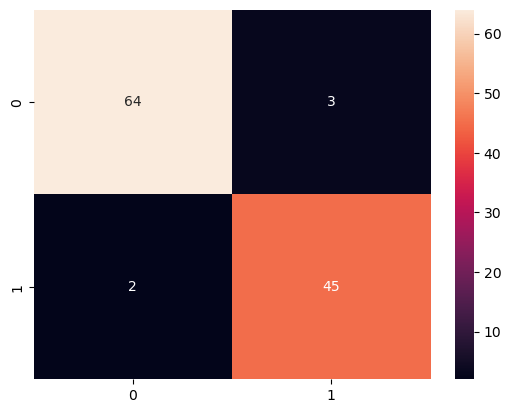

In [21]:
from keras.layers import Dropout  # Add dropout to avoid overfitting
classifier=Sequential()
classifier.add(Dense(units=16,kernel_initializer='uniform',activation='relu',input_dim=30)) # input_dim=30 because we have 30 features, 16 hidden layers because we have 30 features
classifier.add(Dropout(0.3))
classifier.add(Dense(units=16,kernel_initializer='uniform',activation='relu')) # hidden layer
classifier.add(Dropout(0.3))
classifier.add(Dense(units=1,kernel_initializer='uniform',activation='sigmoid')) # output layer

classifier.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])
classifier.fit(X_train, y_train, batch_size=100, epochs=50)

y_predict=classifier.predict(X_test)
y_predict=(y_predict>0.5)
from sklearn.metrics import confusion_matrix
cm=confusion_matrix(y_test,y_predict)
sns.heatmap(cm,annot=True)

In [ ]:
#%pip install scikeras
from scikeras.wrappers import KerasClassifier


In [168]:
from sklearn.model_selection import cross_val_score
from keras.models import Sequential
from keras.layers import Dense

In [182]:
def build_classifier():
    classifier=Sequential()
    classifier.add(Dense(units=16,kernel_initializer='uniform',activation='relu',input_dim=30)) # input_dim=30 because we have 30 features, 16 hidden layers because we have 30 features
    classifier.add(Dense(units=16,kernel_initializer='uniform',activation='relu')) # hidden layer
    classifier.add(Dense(units=1,kernel_initializer='uniform',activation='sigmoid')) # output layer

    classifier.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])
    return classifier

In [183]:
classifier=KerasClassifier(build_fn=build_classifier,batch_size=100,epochs=100)
accuracies=cross_val_score(estimator=classifier,X=X_train,y=y_train,cv=10,n_jobs=-1)

In [187]:
accuracies

array([0.97826087, 1.        , 0.97826087, 0.97826087, 0.95652174,
       0.95555556, 1.        , 0.97777778, 0.97777778, 0.97777778])

In [185]:
mean=accuracies.mean()
mean

0.9780193236714976

In [186]:
std=accuracies.std()
std

0.013904737859076534

# ANN using iris data

In [28]:
# %pip install graphviz
# import graphviz

In [29]:
# import iris dataset
iris=sns.load_dataset('iris')
iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [30]:
X=iris.iloc[ : , 0:4].values
X

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2],
       [5.4, 3.9, 1.7, 0.4],
       [4.6, 3.4, 1.4, 0.3],
       [5. , 3.4, 1.5, 0.2],
       [4.4, 2.9, 1.4, 0.2],
       [4.9, 3.1, 1.5, 0.1],
       [5.4, 3.7, 1.5, 0.2],
       [4.8, 3.4, 1.6, 0.2],
       [4.8, 3. , 1.4, 0.1],
       [4.3, 3. , 1.1, 0.1],
       [5.8, 4. , 1.2, 0.2],
       [5.7, 4.4, 1.5, 0.4],
       [5.4, 3.9, 1.3, 0.4],
       [5.1, 3.5, 1.4, 0.3],
       [5.7, 3.8, 1.7, 0.3],
       [5.1, 3.8, 1.5, 0.3],
       [5.4, 3.4, 1.7, 0.2],
       [5.1, 3.7, 1.5, 0.4],
       [4.6, 3.6, 1. , 0.2],
       [5.1, 3.3, 1.7, 0.5],
       [4.8, 3.4, 1.9, 0.2],
       [5. , 3. , 1.6, 0.2],
       [5. , 3.4, 1.6, 0.4],
       [5.2, 3.5, 1.5, 0.2],
       [5.2, 3.4, 1.4, 0.2],
       [4.7, 3.2, 1.6, 0.2],
       [4.8, 3.1, 1.6, 0.2],
       [5.4, 3.4, 1.5, 0.4],
       [5.2, 4.1, 1.5, 0.1],
       [5.5, 4.2, 1.4, 0.2],
       [4.9, 3

In [31]:
y=iris.iloc[ : , 4].values
y

array(['setosa', 'setosa', 'setosa', 'setosa', 'setosa', 'setosa',
       'setosa', 'setosa', 'setosa', 'setosa', 'setosa', 'setosa',
       'setosa', 'setosa', 'setosa', 'setosa', 'setosa', 'setosa',
       'setosa', 'setosa', 'setosa', 'setosa', 'setosa', 'setosa',
       'setosa', 'setosa', 'setosa', 'setosa', 'setosa', 'setosa',
       'setosa', 'setosa', 'setosa', 'setosa', 'setosa', 'setosa',
       'setosa', 'setosa', 'setosa', 'setosa', 'setosa', 'setosa',
       'setosa', 'setosa', 'setosa', 'setosa', 'setosa', 'setosa',
       'setosa', 'setosa', 'versicolor', 'versicolor', 'versicolor',
       'versicolor', 'versicolor', 'versicolor', 'versicolor',
       'versicolor', 'versicolor', 'versicolor', 'versicolor',
       'versicolor', 'versicolor', 'versicolor', 'versicolor',
       'versicolor', 'versicolor', 'versicolor', 'versicolor',
       'versicolor', 'versicolor', 'versicolor', 'versicolor',
       'versicolor', 'versicolor', 'versicolor', 'versicolor',
       'versicolo

In [32]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
y=le.fit_transform(y)
y

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [33]:
# y=pd.get_dummies(y).values
# y

In [34]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=0)


In [35]:
model=Sequential()
model.add(Dense(units=4,kernel_initializer='uniform',activation='relu',input_shape=(X_train.shape[1],)))
model.add(Dense(units=3,kernel_initializer='uniform',activation='softmax'))

c:\Users\adeel\miniconda3\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [36]:
model.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])

In [37]:
model.fit(X_train,y_train,batch_size=10,epochs=100)

Epoch 1/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 4s 8ms/step - accuracy: 0.3088 - loss: 1.0973
Epoch 2/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.3911 - loss: 1.0942 
Epoch 3/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.3103 - loss: 1.0933  
Epoch 4/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.3602 - loss: 1.0886 
Epoch 5/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.4172 - loss: 1.0806  
Epoch 6/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3748 - loss: 1.0764 
Epoch 7/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.3665 - loss: 1.0689 
Epoch 8/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3673 - loss: 1.0622 
Epoch 9/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3095 - loss: 1.0592 
Epoch 10/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.3432 - loss: 1.0447 
Epoch 11/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.4826 - loss: 1.0246 
Epoch 12/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step

In [38]:
y_predict=model.predict(X_test)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 242ms/step


In [40]:
y_test_class = np.argmax(y_test.reshape(-1, 1), axis=1)


In [41]:
y_predict_class = np.argmax(y_predict, axis=1)

In [42]:
from sklearn.metrics import confusion_matrix,classification_report

In [43]:
print(confusion_matrix(y_test_class,y_predict_class))
print(classification_report(y_test_class,y_predict_class))

[[11 13  6]
 [ 0  0  0]
 [ 0  0  0]]
              precision    recall  f1-score   support

           0       1.00      0.37      0.54        30
           1       0.00      0.00      0.00         0
           2       0.00      0.00      0.00         0

    accuracy                           0.37        30
   macro avg       0.33      0.12      0.18        30
weighted avg       1.00      0.37      0.54        30



c:\Users\adeel\miniconda3\Lib\site-packages\sklearn\metrics\_classification.py:1517: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\adeel\miniconda3\Lib\site-packages\sklearn\metrics\_classification.py:1517: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\adeel\miniconda3\Lib\site-packages\sklearn\metrics\_classification.py:1517: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [22]:
import pandas as pd
BHNames= ['crim','zn','indus','chas','nox','rm',
         'age','dis','rad','tax','ptratio','black','lstat','medv']

In [23]:
url='https://archive.ics.uci.edu/ml/machine-learning-databases/housing/housing.data'

In [24]:
data = pd.read_csv(url, delim_whitespace=True, names=BHNames)

C:\Users\adeel\AppData\Local\Temp\ipykernel_6540\1125703818.py:1: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  data = pd.read_csv(url, delim_whitespace=True, names=BHNames)


In [25]:
# save in csv
data.to_csv('D:\\Drive D\\One drive folder\\OneDrive - Higher Education Commission\\Drive G\\Data science coding\\Data sets\\housing.csv')

In [27]:
data.head()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2


In [28]:
data.describe()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


In [29]:
# summary of data
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   crim     506 non-null    float64
 1   zn       506 non-null    float64
 2   indus    506 non-null    float64
 3   chas     506 non-null    int64  
 4   nox      506 non-null    float64
 5   rm       506 non-null    float64
 6   age      506 non-null    float64
 7   dis      506 non-null    float64
 8   rad      506 non-null    int64  
 9   tax      506 non-null    float64
 10  ptratio  506 non-null    float64
 11  black    506 non-null    float64
 12  lstat    506 non-null    float64
 13  medv     506 non-null    float64
dtypes: float64(12), int64(2)
memory usage: 55.5 KB


In [30]:
data.isnull().sum()

crim       0
zn         0
indus      0
chas       0
nox        0
rm         0
age        0
dis        0
rad        0
tax        0
ptratio    0
black      0
lstat      0
medv       0
dtype: int64

In [31]:
#To Scale data from 0 to 1 apply preprocessing Mms!
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

In [32]:
DataScaled = scaler.fit_transform(data)
DataScaled = pd.DataFrame(DataScaled, columns=BHNames)

In [33]:
DataScaled.describe()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,0.040544,0.113636,0.391378,0.069170,0.349167,0.521869,0.676364,0.242381,0.371713,0.422208,0.622929,0.898568,0.301409,0.389618
std,0.096679,0.233225,0.251479,0.253994,0.238431,0.134627,0.289896,0.191482,0.378576,0.321636,0.230313,0.230205,0.197049,0.204380
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000851,0.000000,0.173387,0.000000,0.131687,0.445392,0.433831,0.088259,0.130435,0.175573,0.510638,0.945730,0.144040,0.267222
50%,0.002812,0.000000,0.338343,0.000000,0.314815,0.507281,0.768280,0.188949,0.173913,0.272901,0.686170,0.986232,0.265728,0.360000
75%,0.041258,0.125000,0.646628,0.000000,0.491770,0.586798,0.938980,0.369088,1.000000,0.914122,0.808511,0.998298,0.420116,0.444444
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


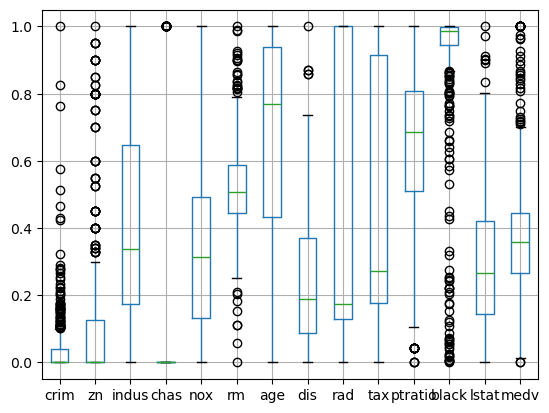

In [34]:
import matplotlib.pyplot as plt
boxplot = DataScaled.boxplot(column=BHNames)
plt.show()

In [35]:
CorData = DataScaled.corr(method='pearson')
with pd.option_context('display.max_rows', None, 'display.max_columns', CorData.shape[1]):
    print(CorData)

             crim        zn     indus      chas       nox        rm       age  \
crim     1.000000 -0.200469  0.406583 -0.055892  0.420972 -0.219247  0.352734   
zn      -0.200469  1.000000 -0.533828 -0.042697 -0.516604  0.311991 -0.569537   
indus    0.406583 -0.533828  1.000000  0.062938  0.763651 -0.391676  0.644779   
chas    -0.055892 -0.042697  0.062938  1.000000  0.091203  0.091251  0.086518   
nox      0.420972 -0.516604  0.763651  0.091203  1.000000 -0.302188  0.731470   
rm      -0.219247  0.311991 -0.391676  0.091251 -0.302188  1.000000 -0.240265   
age      0.352734 -0.569537  0.644779  0.086518  0.731470 -0.240265  1.000000   
dis     -0.379670  0.664408 -0.708027 -0.099176 -0.769230  0.205246 -0.747881   
rad      0.625505 -0.311948  0.595129 -0.007368  0.611441 -0.209847  0.456022   
tax      0.582764 -0.314563  0.720760 -0.035587  0.668023 -0.292048  0.506456   
ptratio  0.289946 -0.391679  0.383248 -0.121515  0.188933 -0.355501  0.261515   
black   -0.385064  0.175520 

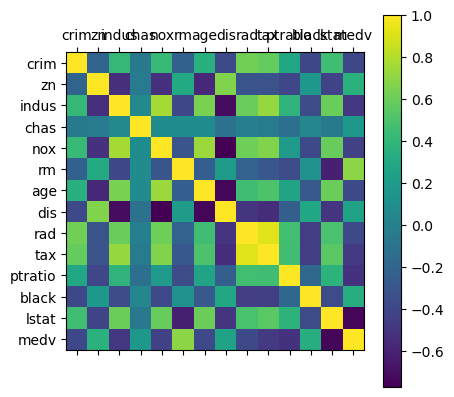

In [36]:
plt.matshow(CorData)
plt.xticks(range(len(CorData.columns)), CorData.columns)
plt.yticks(range(len(CorData.columns)), CorData.columns)
plt.colorbar()
plt.show()

In [37]:
from sklearn.model_selection import train_test_split

X = DataScaled.drop('medv', axis = 1)
print('X shape = ',X.shape)
Y = DataScaled['medv']
print('Y shape = ',Y.shape)

X shape =  (506, 13)
Y shape =  (506,)


In [38]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.30, random_state = 5)
print('X train shape = ',X_train.shape)
print('X test shape = ', X_test.shape)
print('Y train shape = ', Y_train.shape)
print('Y test shape = ',Y_test.shape)

X train shape =  (354, 13)
X test shape =  (152, 13)
Y train shape =  (354,)
Y test shape =  (152,)


In [75]:
#import keras
import keras
from keras.models import Sequential
from keras.layers import Dense
from keras import metrics

In [76]:
#first input and first hidden layer
model=Sequential()
model.add(Dense(20, input_dim=13, kernel_initializer='normal', activation='relu'))
#second hidden layer
model.add(Dense(10, kernel_initializer='normal', activation='relu'))
#output layer
model.add(Dense(1, kernel_initializer='normal'))

c:\Users\adeel\miniconda3\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [77]:
model.compile(loss='mean_squared_error', optimizer='adam')

In [78]:
model.fit(X_train, Y_train, epochs=100, verbose=1)

Epoch 1/100


12/12 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 0.2062
Epoch 2/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.1687 
Epoch 3/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.1535 
Epoch 4/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.1141  
Epoch 5/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0767 
Epoch 6/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0535 
Epoch 7/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0484 
Epoch 8/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0407 
Epoch 9/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0399 
Epoch 10/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0338 
Epoch 11/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0396  
Epoch 12/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0344 
Epoch 13/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0277 
Epoch 14/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0265 
Epoch 15/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0257 


In [79]:
model.summary()

Model: "sequential_5"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_9 (Dense)                 │ (None, 20)             │           280 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_10 (Dense)                │ (None, 10)             │           210 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_11 (Dense)                │ (None, 1)              │            11 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,505 (5.88 KB)

 Trainable params: 501 (1.96 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 1,004 (3.93 KB)

In [80]:
#Testing the test dataset
Y_predKM =  model.predict(X_test)
score = model.evaluate(X_test,Y_test, verbose=0)
print(score)

5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
0.01108672097325325


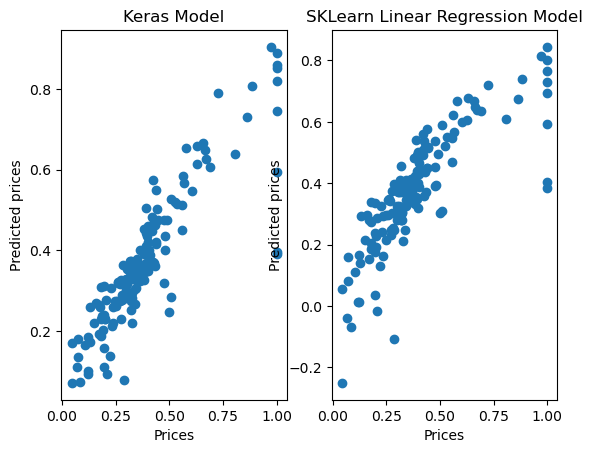

In [82]:
#Multiple Linear Regression
from sklearn.linear_model import LinearRegression

LModel = LinearRegression()
LModel.fit(X_train, Y_train)

Y_predLM = LModel.predict(X_test)

plt.figure(1)
plt.subplot(1,2,1)
plt.scatter(Y_test, Y_predKM)
plt.xlabel("Prices")
plt.ylabel("Predicted prices")
plt.title("Keras Model")

plt.subplot(1,2,2)
plt.scatter(Y_test, Y_predLM)
plt.xlabel("Prices")
plt.ylabel("Predicted prices")
plt.title("SKLearn Linear Regression Model")
plt.show()

In [83]:
from sklearn.metrics import mean_squared_error

mse = mean_squared_error(Y_test, Y_predLM)
print('Linear Regression Model Mean Square Error')
print(mse)

Linear Regression Model Mean Square Error
0.015159030964982022
